# Unsupervised Learning

So far, we've used data where each sample had a label associated with it. Models that require labels use _supervised_ learning. These models made predictions based on data, and when they made incorrect predictions we informed the models how to correct themselves. That is, we supervise the models' learning and show them how to fix their mistakse.  
  
What about datasets where we don't have labels?

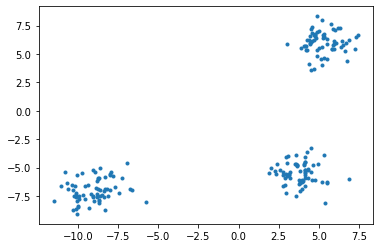

In [10]:
from sklearn.datasets import make_blobs
%matplotlib inline
from matplotlib import pyplot as plt

x_data, y_labels = make_blobs(n_samples=200, n_features=2)
plt.plot(x_data[:,0], x_data[:,1], '.')

Without additional information, would you be able to classify a point based on its position?  

There are algorithms that can be used to create labels for unlabeled data. The algorithms look at the data, identify which points seem similar to others, and apply labels to data which is 'similar enough'. The definition of similarity changes across algorithms. We'll look at `KMeans` in the next example.

## Clustering via KMeans

In this example, we're going to examine how to automatically apply labels to unlabeled data. We'll use `make_blobs` to generate data, then `KMeans` to try to classify the generated points.  
  
1) Generate data using `make_blobs`. Store the labels in a variable for later. Plot the blobs.  
2) Initialize `sklearn.cluster.KMeans`. Initialize with a number of clusters `n_clusters`. 
3) Fit your KMeans object to your data. Note that since this is unsupervised, you don't fit the labels. i.e. fit(X) instead of fit(X,Y)  
4) Plot the predicted labels. Compare to the plot from (1)

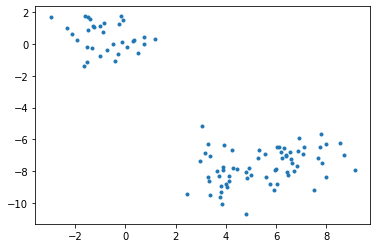

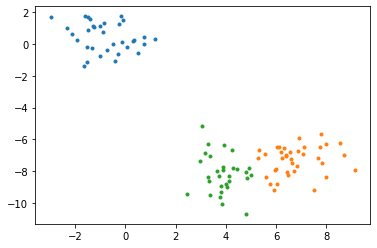

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

x_data, y_label, centers = make_blobs(n_samples=100, n_features=2, return_centers=True)
plt.plot(x_data[:,0], x_data[:,1], '.')
km = KMeans(n_clusters=3)
km.fit(x_data)

pred = km.predict(x_data)
plt.figure()
for label in np.unique(km.labels_):
    plt.plot(x_data[pred==label,0], x_data[pred==label, 1], '.')

What happens if you initialize your KMeans with a different number of clusters?  
What happens if you have two clusters close together?  

## Feature Space Reduction

With large-dimensional data, you may find yourself with more data than information. A common way to do feature space reduction is to use methods like Principal Components Analysis (PCA).  
PCA generates the set of eigenvectors for the covariance matrix of your data. More simply: it generates samples which explain variance in the data. By using data that explains most of the variance, we can reduce the number of features without sacrificing the information content. As with clustering, PCA is unsupervised and doesn't consider data labels when computing variance.

### PCA Example
  
In this example, we'll use PCA to reduce data from 4 dimensions to 2 in order to visualize data. Remember the Iris dataset that we classified using logistic regression? It had four dimensions: sepal width and height, petal width and height. Use PCA to reduce the number of features to 2, and plot the distributions for each class of iris.  
  
1) Load the iris dataset.  
2) Initialize a PCA object.  
3) Fit PCA to the Iris dataset.  
4) Transform the Iris dataset using the PCA components. Plot them; use different symbols/colors to identify the different classes.  
5) Initialize a logistic regression classifier.  
6) Fit the classifier to the transformed data. How does the model performance compare to the classifier we had earlier?

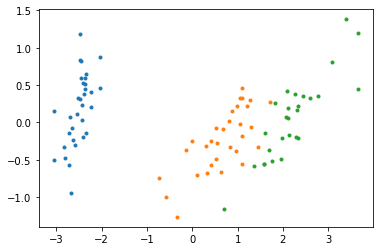

In [33]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris_data, iris_label = load_iris(return_X_y=True)
iris_data_train, iris_data_test, iris_label_train, iris_label_test = train_test_split(iris_data,
                                                                                     iris_label, train_size=0.6)
pc = PCA(n_components=2)
iris_recast_train = pc.fit_transform(iris_data_train)

for i in range(3):
    plt.plot(iris_recast_train[iris_label_train==i,0], iris_recast_train[iris_label_train==i, 1], '.')

In [34]:
logit = LogisticRegression(solver='liblinear')
logit.fit(iris_recast_train, iris_label_train)

iris_recast_test = pc.transform(iris_data_test)
print('PCA feature score: ' + str(logit.score(iris_recast_test, iris_label_test)))

# Compare to non-pca
logit2 = LogisticRegression(solver='liblinear')
logit2.fit(iris_data_train, iris_label_train)
print('Full feature score: ' + str(logit2.score(iris_data_test, iris_label_test)))

PCA feature score: 0.8666666666666667
Full feature score: 0.9333333333333333
